## Research Areas in Citizen Science

CS projects have been assigned into five broad categories using ESA:


*   Arts & Humanities

*   Life Sciences & Biomedicine

*   Physical Sciences

*   Social Sciences

*   Technology

Reference: https://images.webofknowledge.com/images/help/WOS/hp_research_areas_easca.html


In [25]:
# pandas and numpy for reading and manipulating the data
import pandas as pd
import numpy as np

# matplotlib and seaborn for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# read the dataset
dbRecords = pd.read_csv('query_result.csv')

In [8]:
# basic stats about the data
dbRecords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4949 entries, 0 to 4948
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Title                  4949 non-null   object
 1   Description            4882 non-null   object
 2   Description En         1937 non-null   object
 3   Language               4945 non-null   object
 4   URL Platform           4947 non-null   object
 5   Wp2 ID                 4944 non-null   object
 6   Geographical Location  2881 non-null   object
 7   Geo Location           2491 non-null   object
 8   Plat Country           4947 non-null   object
 9   Loc                    4846 non-null   object
 10  Country                171 non-null    object
 11  Wb Research Areas      4849 non-null   object
 12  Research Areas         4849 non-null   object
 13  Topics                 3338 non-null   object
 14  Organizations          3076 non-null   object
 15  Sdg                  

## Q1:  What is the distribution of research areas at the project level? (considering the 5 main research areas)


In [11]:
#projects without research area assignments
dbRecords['Research Areas'].isnull().sum() 

100

In [16]:
#filter project title and researh area assignment for analysis
filter = dbRecords[['Title', 'Research Areas']]
df1 = filter.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 4948
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           4849 non-null   object
 1   Research Areas  4849 non-null   object
dtypes: object(2)
memory usage: 113.6+ KB


In [20]:
pd.options.display.max_colwidth = 100
df1.head()

,Title,Research Areas
0,Virenmonitoring,"[""Life Sciences & Biomedicine, Virology, 0.9627043178755198""]"
1,Deutsch in Österreich,"[""Social Sciences, Linguistics, 0.7164063577732533"" ""Life Sciences & Biomedicine, Audiology & Sp..."
2,Citree,"[""Physical Sciences, Sustainability Science, 0.37101916100160376"" ""Technology, Operations Resear..."
3,Fossilfinder,"[""Technology, Remote Sensing, 0.40562888841322914"" ""Life Sciences & Biomedicine, Paleontology, 0..."
4,Roadkill,"[""Life Sciences & Biomedicine, Veterinary Sciences, 0.6273242181218659"" ""Life Sciences & Biomedi..."


In [21]:
# only report the highest similarity RA assignment
newlist = []

for a in df1['Research Areas']:
  ra = a.split(",")[0] 
  strippedText = str(ra).replace('["',' ') 
  newlist.append(strippedText) 

In [26]:
df1['Extracted_RAs'] = np.array(newlist) 
df1.head()

,Title,Research Areas,Extracted_RAs
0,Virenmonitoring,"[""Life Sciences & Biomedicine, Virology, 0.9627043178755198""]",Life Sciences & Biomedicine
1,Deutsch in Österreich,"[""Social Sciences, Linguistics, 0.7164063577732533"" ""Life Sciences & Biomedicine, Audiology & Sp...",Social Sciences
2,Citree,"[""Physical Sciences, Sustainability Science, 0.37101916100160376"" ""Technology, Operations Resear...",Physical Sciences
3,Fossilfinder,"[""Technology, Remote Sensing, 0.40562888841322914"" ""Life Sciences & Biomedicine, Paleontology, 0...",Technology
4,Roadkill,"[""Life Sciences & Biomedicine, Veterinary Sciences, 0.6273242181218659"" ""Life Sciences & Biomedi...",Life Sciences & Biomedicine


In [29]:
# distribution of RAs across 4849 projects
df1['Extracted_RAs'].value_counts()

 Life Sciences & Biomedicine    2492
 Technology                      965
 Social Sciences                 671
 Physical Sciences               434
 Arts & Humanities               257
[]                                30
Name: Extracted_RAs, dtype: int64

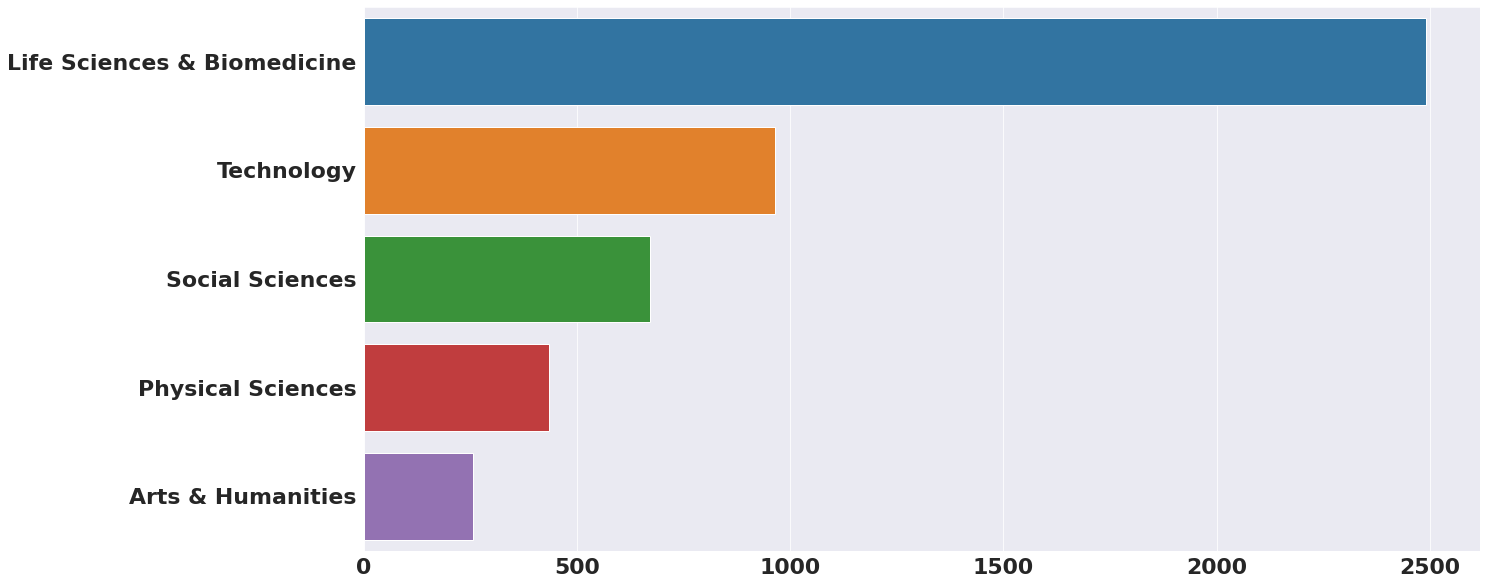

In [31]:
plt.rcParams["figure.figsize"] = [20, 10]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

sns.set_style('darkgrid')
x = ['Life Sciences & Biomedicine', 'Technology', 'Social Sciences', 'Physical Sciences', 'Arts & Humanities']
y = [2492, 965, 671, 434, 257]
save_plot = sns.barplot(y, x)
fig = save_plot.get_figure()
fig.savefig("assignment.png") 

## Q2: In each research area what is the most common sub research area? 

In [33]:
df1.rename(columns = {'Research Areas':'Research_Areas'}, inplace = True)
df1 = df1[df1.Research_Areas != '[]']

In [34]:
#extract related sub research area
sublist = []
for a in df1['Research_Areas']:
  x = a.split(",")[1] 
  sublist.append(x) 

In [36]:
df1['Extracted_second_element'] = np.array(sublist) 
df1.head()

,Title,Research_Areas,Extracted_RAs,Extracted_second_element
0,Virenmonitoring,"[""Life Sciences & Biomedicine, Virology, 0.9627043178755198""]",Life Sciences & Biomedicine,Virology
1,Deutsch in Österreich,"[""Social Sciences, Linguistics, 0.7164063577732533"" ""Life Sciences & Biomedicine, Audiology & Sp...",Social Sciences,Linguistics
2,Citree,"[""Physical Sciences, Sustainability Science, 0.37101916100160376"" ""Technology, Operations Resear...",Physical Sciences,Sustainability Science
3,Fossilfinder,"[""Technology, Remote Sensing, 0.40562888841322914"" ""Life Sciences & Biomedicine, Paleontology, 0...",Technology,Remote Sensing
4,Roadkill,"[""Life Sciences & Biomedicine, Veterinary Sciences, 0.6273242181218659"" ""Life Sciences & Biomedi...",Life Sciences & Biomedicine,Veterinary Sciences


In [39]:
df2 = df1[['Extracted_RAs', 'Extracted_second_element']]
df3 = df2.groupby(['Extracted_RAs','Extracted_second_element'])['Extracted_second_element'].count()
df3.to_frame()

Extracted_second_element
Extracted_RAs      Extracted_second_element                                    
 Arts & Humanities  Architecture                                              3
                    Art                                                      10
                    Arts & Humanities Other Topics                            4
                    Asian Studies                                             1
                    Classics                                                  1
...                                                                         ...
 Technology         Robotics                                                  2
                    Science & Technology Other Topics                        23
                    Statistics & Probability                                 12
                    Telecommunication                                        63
                    Transportation                                           34

[137 rows x 1 columns]

In [40]:
df3.to_csv('grouped.csv')

In [44]:
grouped_sub_ra = pd.read_csv('grouped.csv')
grouped_sub_ra.rename(columns={'Extracted_second_element.1': 'count_sub_ra'}, inplace = True)

In [45]:
#top 3 sub research areas from main research area Life Sciences & Biomedicine
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Life Sciences & Biomedicine"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_second_element,count_sub_ra
21,Life Sciences & Biomedicine,Biodiversity & Conservation,682
27,Life Sciences & Biomedicine,Environmental Sciences & Ecology,240
54,Life Sciences & Biomedicine,Ornithology,233


In [46]:
#top 3 sub research areas from main research area Technology
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Technology"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_second_element,count_sub_ra
131,Technology,Remote Sensing,393
118,Technology,Construction & Building Technology,210
135,Technology,Telecommunication,63


In [47]:
#top 3 sub research areas from main research area Social Sciences
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Social Sciences"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_second_element,count_sub_ra
100,Social Sciences,Education & Educational Research,121
91,Social Sciences,Archaeology,82
108,Social Sciences,Public Administration,62


In [48]:
#top 3 sub research areas from main research area Physical Sciences
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Physical Sciences"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_second_element,count_sub_ra
90,Physical Sciences,Water Resources,165
74,Physical Sciences,Astronomy & Astrophysics,144
88,Physical Sciences,Sustainability Science,23


In [49]:
#top 3 sub research areas from main research area Arts & Humanities
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Arts & Humanities"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_second_element,count_sub_ra
8,Arts & Humanities,History & Philosophy of Science,122
7,Arts & Humanities,History,52
9,Arts & Humanities,Literature,34


## Q3: What is the distribution of research areas at the CS platform level?

In [52]:
#join original input data to obtain platform details
merged_data = df1.merge(dbRecords, left_on='Title', right_on='Title', suffixes=('_left', '_right')) 

#data relevant for analysis
platofrm_analysis = merged_data[['Wp2 ID', 'Title', 'Research Areas', 'Extracted_RAs', 'Extracted_second_element']]
platofrm_analysis.head() 

,Wp2 ID,Title,Research Areas,Extracted_RAs,Extracted_second_element
0,9,Virenmonitoring,"[""Life Sciences & Biomedicine, Virology, 0.9627043178755198""]",Life Sciences & Biomedicine,Virology
1,9,Deutsch in Österreich,"[""Social Sciences, Linguistics, 0.7164063577732533"" ""Life Sciences & Biomedicine, Audiology & Sp...",Social Sciences,Linguistics
2,9,Citree,"[""Physical Sciences, Sustainability Science, 0.37101916100160376"" ""Technology, Operations Resear...",Physical Sciences,Sustainability Science
3,"[""9"" ""89""]",Fossilfinder,"[""Technology, Remote Sensing, 0.40562888841322914"" ""Life Sciences & Biomedicine, Paleontology, 0...",Technology,Remote Sensing
4,"[""87"" ""9"" ""89""]",Roadkill,"[""Life Sciences & Biomedicine, Veterinary Sciences, 0.6273242181218659"" ""Life Sciences & Biomedi...",Life Sciences & Biomedicine,Veterinary Sciences


In [54]:
platofrm_analysis.rename(columns={'Wp2 ID': 'PlatformID'}, inplace = True)
platofrm_analysis.to_csv('platofrm_analysis.csv') 

In [57]:
#NOTE: # platofrm_analysis.csv has been manually preprocessed by checking multiple Platfrom ID assignments to a single CS prokect
#load processed data
platform_percentages = pd.read_csv('platform_assignment.csv')
platform_percentages.head()

,Unnamed: 0,PlatformID,Title,Research Areas,Extracted_RAs,Extracted_second_element
0,303.0,1,FietsSTEM voor Scholen (BikeSTEM for Schools) - Scivil,"Social Sciences, Education & Educational Research, 0.5884696826869331",Social Sciences,Education & Educational Research
1,304.0,1,MamaMito - Scivil,"Life Sciences & Biomedicine, Research & Experimental Medicine, 0.5959582243961945"" ""Technology, ...",Life Sciences & Biomedicine,Research & Experimental Medicine
2,305.0,1,HASSELair - Scivil,"Technology, Construction & Building Technology, 0.4399435100551528"" ""Technology, Science & Techn...",Technology,Construction & Building Technology
3,306.0,1,Mijn Tuinlab (My Gardenlab) - Scivil,"Arts & Humanities, History & Philosophy of Science, 0.32355786837932243"" ""Life Sciences & Biomed...",Arts & Humanities,History & Philosophy of Science
4,307.0,1,¿Burgerpraat! (Citizens' talk) - Scivil,"Social Sciences, Linguistics, 0.5102728695689525"" ""Social Sciences, Communication, 0.45482171422...",Social Sciences,Linguistics


In [63]:
platform_percentages.rename(columns={'Title': 'Project_Titile'}, inplace = True)
#platform_percentages_count = platform_percentages.groupby(['PlatformID','Extracted_RAs'])['Extracted_RAs'].count()
#platform_percentages_count.to_csv('platform_percentages_count.csv')

Selected list of Platforms: Platform ID, Name

+ 13 - Zooniverse
+ 17 - EU citizen science
+ 1- Citizen Science Vlaanderen
+ 6 - Ciencia Ciudadana España
+ 10 - Schweiz forscht



In [64]:
# Research area assignment zooniverse 
zooniverse = platform_percentages[platform_percentages['PlatformID'] == 13] 
zooniverse['Extracted_RAs'].value_counts()


Life Sciences & Biomedicine    221
Technology                      71
Physical Sciences               47
Social Sciences                 15
Arts & Humanities               11
Name: Extracted_RAs, dtype: int64

In [65]:
# Research area assignment EU citizen science 
EU = platform_percentages[platform_percentages['PlatformID'] == 17] 
EU['Extracted_RAs'].value_counts()

Life Sciences & Biomedicine    90
Technology                     34
Social Sciences                24
Physical Sciences              12
Arts & Humanities              12
Name: Extracted_RAs, dtype: int64

In [67]:
# Research area assignment Vlaanderen
Vlaanderen = platform_percentages[platform_percentages['PlatformID'] == 1] 
Vlaanderen['Extracted_RAs'].value_counts()

Life Sciences & Biomedicine    10
Technology                      4
Social Sciences                 2
Physical Sciences               2
Arts & Humanities               1
Name: Extracted_RAs, dtype: int64

In [ ]:
# Research area assignment Ciencia Ciudadana España
Ciencia = platform_percentages[platform_percentages['PlatformID'] == 6] 
Ciencia['Extracted_RAs'].value_counts()

Technology                     66
Social Sciences                46
Life Sciences & Biomedicine    44
Arts & Humanities              16
Physical Sciences              12
Name: Extracted_RAs, dtype: int64

In [69]:
# Research area assignment Schweiz forscht
Schweiz = platform_percentages[platform_percentages['PlatformID'] == 10] 
Schweiz['Extracted_RAs'].value_counts()

Life Sciences & Biomedicine    32
Technology                     21
Social Sciences                 9
Arts & Humanities               2
Physical Sciences               2
Name: Extracted_RAs, dtype: int64